In [161]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as pex

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [125]:
# Load the dataset
tfp = 'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv'
tfp = pd.read_csv(tfp)
tfp

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [126]:
tfp.shape

(7752, 25)

In [127]:
tfp.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

tp.info()

In [128]:
tfp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [129]:
tfp = tfp.dropna().reset_index()
tfp.isna().sum()

index               0
station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [130]:
tfp.shape

(7588, 26)

In [131]:
tfp['Date'] = pd.to_datetime(tfp['Date'])
tfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             7588 non-null   int64         
 1   station           7588 non-null   float64       
 2   Date              7588 non-null   datetime64[ns]
 3   Present_Tmax      7588 non-null   float64       
 4   Present_Tmin      7588 non-null   float64       
 5   LDAPS_RHmin       7588 non-null   float64       
 6   LDAPS_RHmax       7588 non-null   float64       
 7   LDAPS_Tmax_lapse  7588 non-null   float64       
 8   LDAPS_Tmin_lapse  7588 non-null   float64       
 9   LDAPS_WS          7588 non-null   float64       
 10  LDAPS_LH          7588 non-null   float64       
 11  LDAPS_CC1         7588 non-null   float64       
 12  LDAPS_CC2         7588 non-null   float64       
 13  LDAPS_CC3         7588 non-null   float64       
 14  LDAPS_CC4         7588 n

In [132]:
tfp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,7588.0,3859.164207,2232.869924,0.000000,1936.750000,3843.500000,5781.250000,7749.000000
station,7588.0,13.014101,7.217858,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7588.0,29.748366,2.967401,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7588.0,23.195809,2.400880,11.300000,21.600000,23.400000,24.800000,29.900000
LDAPS_RHmin,7588.0,56.724969,14.626559,19.794666,45.960243,55.023199,67.115099,98.524734
LDAPS_RHmax,7588.0,88.360823,7.199456,58.936283,84.203724,89.784122,93.742725,100.000153
LDAPS_Tmax_lapse,7588.0,29.620128,2.943496,17.624954,27.673756,29.709537,31.711109,38.542255
LDAPS_Tmin_lapse,7588.0,23.511786,2.342579,14.272646,22.086820,23.758249,25.155660,29.619342
LDAPS_WS,7588.0,7.094097,2.177034,2.882580,5.675358,6.547838,8.028960,21.857621
LDAPS_LH,7588.0,62.492606,33.686158,-13.603212,37.206201,56.898324,84.235666,213.414006


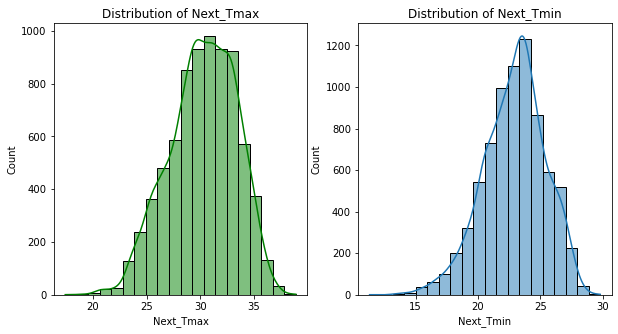

Minimum Tmax is 20.0 and Maximum Tmax is 37.6
Minimum Tmin is 11.3 and Maximum Tmin is 29.9


In [133]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(tfp['Next_Tmax'], bins=20, kde=True, color = 'g')
plt.title('Distribution of Next_Tmax')
plt.subplot(1, 2, 2)
sns.histplot(tfp['Next_Tmin'], bins=20, kde=True)
plt.title('Distribution of Next_Tmin')
plt.show()

print('Minimum Tmax is {} and Maximum Tmax is {}'.format(tfp['Present_Tmax'].min(),tfp['Present_Tmax'].max()))
print('Minimum Tmin is {} and Maximum Tmin is {}'.format(tfp['Present_Tmin'].min(),tfp['Present_Tmin'].max()))

In [134]:
line_plot_1 = pex.line(tfp,x = 'Date', y = ['Present_Tmax', 'Present_Tmin'], title = 'Variation of Temperature with Time')
line_plot_1.show()

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

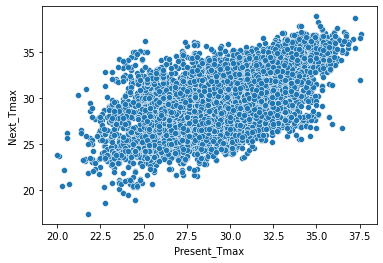

In [135]:
sns.scatterplot(data=tfp, x='Present_Tmax', y='Next_Tmax')

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

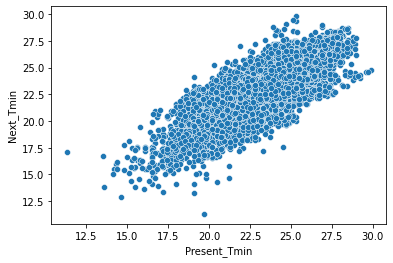

In [136]:
sns.scatterplot(data=tfp, x='Present_Tmin', y='Next_Tmin')

Minimum RHmax is 58.93628311 and Maximum RHmax is 100.0001526
Minimum RHmin is 19.79466629 and Maximum RHmin is 98.5247345


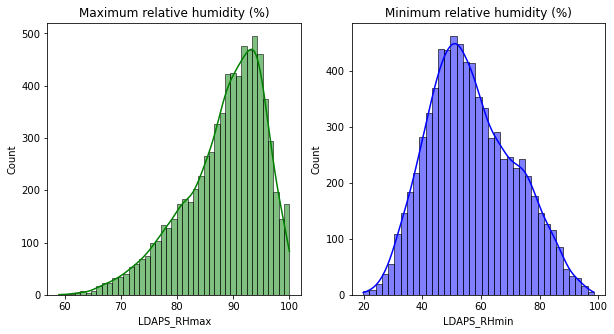

In [137]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(tfp['LDAPS_RHmax'],kde=True,color='g')
plt.title('Maximum relative humidity (%)')
plt.subplot(1,2,2)
sns.histplot(tfp['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)')
print('Minimum RHmax is {} and Maximum RHmax is {}'.format(tfp['LDAPS_RHmax'].min(),tfp['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} and Maximum RHmin is {}'.format(tfp['LDAPS_RHmin'].min(),tfp['LDAPS_RHmin'].max()))

In [138]:
line_plot_2 = pex.line(tfp,x = 'Date', y = ['LDAPS_RHmax', 'LDAPS_RHmin'], title = 'Variation of Humidity with Time')
line_plot_2.show()

In [139]:
tfp.skew()

index               0.013037
station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [140]:
num_cols = [i for i in tfp.columns if tfp[i].nunique()>30 and i!='Date']
cat_cols = [i for i in tfp.columns if tfp[i].nunique()<30]
print('Numerical Columns :',num_cols, "Categorical Columns : ", cat_cols, sep='\n \n')

Numerical Columns :
 
['index', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
 
Categorical Columns : 
 
['station', 'lat', 'lon', 'DEM', 'Slope']


In [141]:
tfp.drop('Date',axis=1,inplace=True)
tfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7588 non-null   int64  
 1   station           7588 non-null   float64
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [142]:
tfp['Slope'].unique()

array([2.785 , 0.5141, 0.2661, 2.5348, 0.5055, 0.1457, 0.0985, 1.5629,
       0.4125, 5.1782, 0.6233, 0.5931, 2.6865, 0.618 , 0.8552, 2.2579,
       0.697 , 1.2313, 1.7678, 4.7296, 0.5721, 0.1332, 0.1554, 0.2223,
       0.2713])

In [143]:
tfp['Slope'] = round(tfp['Slope'],4)
tfp['Slope']

0       2.7850
1       0.5141
2       0.2661
3       2.5348
4       0.5055
         ...  
7583    0.5721
7584    0.1332
7585    0.1554
7586    0.2223
7587    0.2713
Name: Slope, Length: 7588, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0.0985'),
  Text(1, 0, '0.1332'),
  Text(2, 0, '0.1457'),
  Text(3, 0, '0.1554'),
  Text(4, 0, '0.2223'),
  Text(5, 0, '0.2661'),
  Text(6, 0, '0.2713'),
  Text(7, 0, '0.4125'),
  Text(8, 0, '0.5055'),
  Text(9, 0, '0.5141'),
  Text(10, 0, '0.5721'),
  Text(11, 0, '0.5931'),
  Text(12, 0, '0.618'),
  Text(13, 0, '0.6233'),
  Text(14, 0, '0.697'),
  Text(15, 0, '0.8552'),
  Text(16, 0, '1.2313'),
  Text(17, 0, '1.5629'),
  Text(18, 0, '1.7678'),
  Text(19, 0, '2.2579'),
  Text(20, 0, '2.5348'),
  Text(21, 0, '2.6865'),
  Text(22, 0, '2.785'),
  Text(23, 0, '4.7296'),
  Text(24, 0, '5.1782')])

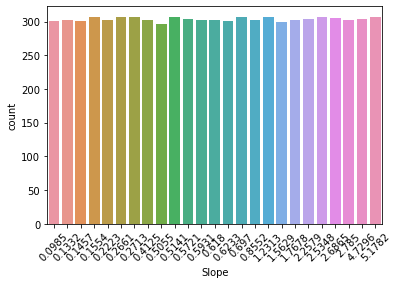

In [144]:
sns.countplot(tfp['Slope'])
plt.xticks(rotation=45)

In [146]:
x = tfp.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y_max = tfp['Next_Tmax']
y_min = tfp['Next_Tmin']

In [147]:
x_train, x_test, y_max_train, y_max_test, y_min_train, y_min_test = train_test_split(x, y_max, y_min, test_size=0.2, random_state=42)

In [148]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [152]:
max_temp_model = LinearRegression()
max_temp_model.fit(x_train_scaled, y_max_train)
max_temp_pred = max_temp_model.predict(x_test_scaled)

In [159]:
print('Maximum Temperature Model:')
print('MAE:', mean_absolute_error(y_max_test, max_temp_pred))
print('MSE:', mean_squared_error(y_max_test, max_temp_pred))
print('R2 Score:', r2_score(y_max_test, max_temp_pred))

Maximum Temperature Model:
MAE: 1.110622828374303
MSE: 2.1409072961091353
R2 Score: 0.7726663126004695


In [162]:
min_temp_model = RandomForestRegressor()
min_temp_model.fit(x_train_scaled, y_min_train)
min_temp_pred = min_temp_model.predict(x_test_scaled)

In [163]:
print('Minimum Temperature Model:')
print('MAE:', mean_absolute_error(y_min_test, min_temp_pred))
print('MSE:', mean_squared_error(y_min_test, min_temp_pred))
print('R2 Score:', r2_score(y_min_test, min_temp_pred))

Minimum Temperature Model:
MAE: 0.5752957839262185
MSE: 0.5889003629776022
R2 Score: 0.9041375870388215
